In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import nltk
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd .read_csv('/content/drive/MyDrive/Ai-lab/paper v2/final-code and slide/Copy of emotion_sentimen_dataset.csv')
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [7]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=429f6269ff9616198bb98b83857fddffd64445427711545f4ee2868e0f233d94
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Emotion Recognition")

profile.to_file("emotion_recognition_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

([<matplotlib.patches.Wedge at 0x7c8db2ca0c10>,
 [Text(-0.8968681975074431, 0.6368888728025872, 'neutral'),
  Text(0.5116845310976187, -0.973744802623054, 'love'),
  Text(0.7364361572609892, -0.8171057375142263, 'happiness'),
  Text(0.8620834424273901, -0.6832365170953182, 'sadness'),
  Text(0.9422538840086998, -0.5675893040487284, 'relief'),
  Text(1.0033026167654389, -0.45098099648613016, 'hate'),
  Text(1.0444542825775267, -0.3451307746426913, 'anger'),
  Text(1.069692979534078, -0.2564311399489279, 'fun'),
  Text(1.0854606992620601, -0.17825563204992917, 'enthusiasm'),
  Text(1.094290447888303, -0.11193040543309643, 'surprise'),
  Text(1.098326274756438, -0.06065801002048754, 'empty'),
  Text(1.0998279230708021, -0.0194560950287, 'worry'),
  Text(1.0999998777482256, -0.0005186076445930045, 'boredom')])

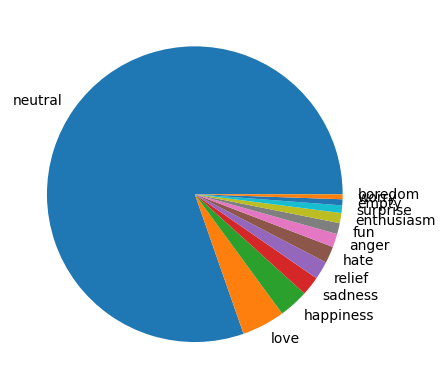

In [9]:
plt.pie(df.Emotion.value_counts(), labels = df.Emotion.value_counts().index)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df.text.str.lower(), df.Emotion, shuffle = True, test_size = 0.2, random_state = 42)

In [11]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

counter = CountVectorizer(
    stop_words=nltk.corpus.stopwords.words("english"),
    ngram_range=(1,1)
)
counter.fit_transform(df.text.str.lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<839555x75132 sparse matrix of type '<class 'numpy.int64'>'
	with 7598087 stored elements in Compressed Sparse Row format>

In [13]:
X_train_bow = counter.transform(X_train)
X_test_bow = counter.transform(X_test)

Classification Report:
              precision    recall  f1-score   support

       anger       0.99      0.99      0.99      2489
     boredom       1.00      0.86      0.92        21
       empty       1.00      0.97      0.99      1096
  enthusiasm       1.00      0.99      0.99      1839
         fun       1.00      0.98      0.99      1977
   happiness       0.99      1.00      1.00      5370
        hate       1.00      0.99      0.99      3018
        love       1.00      0.99      1.00      8001
     neutral       1.00      1.00      1.00    134999
      relief       1.00      0.98      0.99      3396
     sadness       1.00      0.98      0.99      3428
    surprise       1.00      0.99      0.99      1372
       worry       1.00      0.99      0.99       905

    accuracy                           1.00    167911
   macro avg       1.00      0.98      0.99    167911
weighted avg       1.00      1.00      1.00    167911

Confusion Matrix:
[[  2461      0      0      0      0  

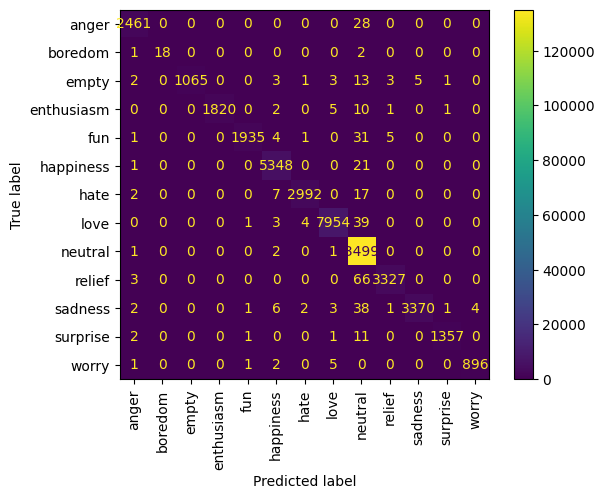

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
model = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
model.fit(X_train_bow, Y_train)
Y_pred = model.predict(X_test_bow)

# Generate a classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
print(cm)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.61      0.73      2489
     boredom       1.00      0.05      0.09        21
       empty       0.97      0.51      0.67      1096
  enthusiasm       0.96      0.68      0.80      1839
         fun       0.93      0.50      0.65      1977
   happiness       0.90      0.57      0.70      5370
        hate       0.91      0.55      0.68      3018
        love       0.97      0.52      0.67      8001
     neutral       0.91      1.00      0.95    134999
      relief       0.94      0.48      0.64      3396
     sadness       0.99      0.64      0.78      3428
    surprise       0.98      0.62      0.76      1372
       worry       1.00      0.09      0.17       905

    accuracy                           0.91    167911
   macro avg       0.95      0.53      0.64    167911
weighted avg       0.91      0.91      0.90    167911

Confusion Matrix:
[[  1522      0      0      0      1  

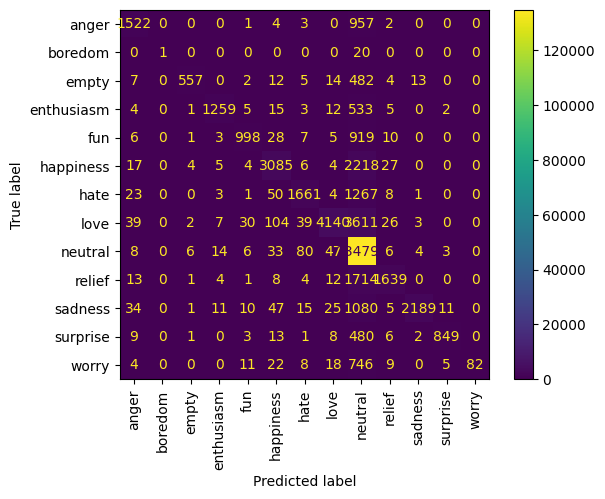

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')

# Train the model
knn_model.fit(X_train_bow, Y_train)

# Make predictions
knn_pred = knn_model.predict(X_test_bow)

# Generate a classification report
print("Classification Report:")
print(classification_report(Y_test, knn_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, knn_pred, labels=knn_model.classes_)
print(cm)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      2489
     boredom       1.00      1.00      1.00        21
       empty       1.00      0.99      1.00      1096
  enthusiasm       1.00      1.00      1.00      1839
         fun       1.00      1.00      1.00      1977
   happiness       1.00      1.00      1.00      5370
        hate       1.00      1.00      1.00      3018
        love       1.00      1.00      1.00      8001
     neutral       1.00      1.00      1.00    134999
      relief       1.00      1.00      1.00      3396
     sadness       1.00      1.00      1.00      3428
    surprise       1.00      1.00      1.00      1372
       worry       1.00      1.00      1.00       905

    accuracy                           1.00    167911
   macro avg       1.00      1.00      1.00    167911
weighted avg       1.00      1.00      1.00    167911

Confusion Matrix:
[[  2485      0      0      0      0  

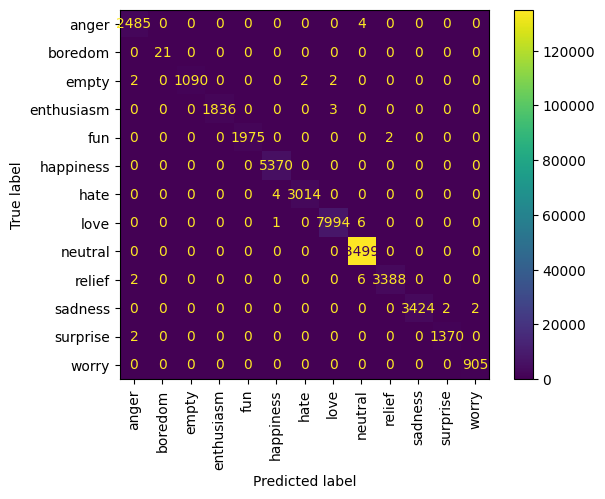

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the Linear SVC model
svm_model = LinearSVC()
svm_model.fit(X_train_bow, Y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_bow)

# Generate a classification report
print("Classification Report:")
print(classification_report(Y_test, svm_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, svm_pred, labels=svm_model.classes_)
print(cm)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.show()